In [8]:
import tensorflow as tf

In [10]:
mnist = tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y) = mnist.load_data()
print('\n train_x:%s, train_y:%s, test_x:%s, test_y:%s'%(train_x.shape,train_y.shape,test_x.shape,test_y.shape))



 train_x:(60000, 28, 28), train_y:(60000,), test_x:(10000, 28, 28), test_y:(10000,)


In [11]:
#归一化、并转换为tensor张量，数据类型为float32.
X_train,X_test = tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32)
y_train,y_test = tf.cast(train_y,tf.int16),tf.cast(test_y,tf.int16)


In [13]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))     #添加Flatten层说明输入数据的形状
model.add(tf.keras.layers.Dense(128,activation='relu'))     #添加隐含层，为全连接层，128个节点，relu激活函数
model.add(tf.keras.layers.Dense(10,activation='softmax'))   #添加输出层，为全连接层，10个节点，softmax激活函数
print('\n',model.summary())     #查看网络结构和参数信息


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


 None


In [14]:

#adam算法参数采用keras默认的公开参数，损失函数采用稀疏交叉熵损失函数，准确率采用稀疏分类准确率函数
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

#批量训练大小为64，迭代5次，测试集比例0.2（48000条训练集数据，12000条测试集数据）
history = model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.2)

model.evaluate(X_test,y_test,verbose=2)     #每次迭代输出一条记录，来评价该模型是否有比较好的泛化能力


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5611 - sparse_categorical_accuracy: 0.8445 - val_loss: 0.1814 - val_sparse_categorical_accuracy: 0.9494
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1591 - sparse_categorical_accuracy: 0.9554 - val_loss: 0.1331 - val_sparse_categorical_accuracy: 0.9609
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.1137 - val_sparse_categorical_accuracy: 0.9673
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9775 - val_loss: 0.1008 - val_sparse_categorical_accuracy: 0.9699
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9822 - val_loss: 0.0940 - val_sparse_categorical_accuracy: 0.9717
313/313 - 0s - 824us/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9740


[0.08768429607152939, 0.9739999771118164]

In [16]:

#保存模型参数
#model.save_weights('mnist_weights.h5')
#保存整个模型
model.save('mnist_weights.h5')


{'loss': [0.32894420623779297, 0.15025196969509125, 0.10440230369567871, 0.07810191065073013, 0.06228166073560715], 'sparse_categorical_accuracy': [0.9095625281333923, 0.9573125243186951, 0.9697708487510681, 0.9766666889190674, 0.9817708134651184], 'val_loss': [0.18142375349998474, 0.13307340443134308, 0.11366932839155197, 0.10077444463968277, 0.09404898434877396], 'val_sparse_categorical_accuracy': [0.9494166374206543, 0.9609166383743286, 0.9673333168029785, 0.9699166417121887, 0.971666693687439]}


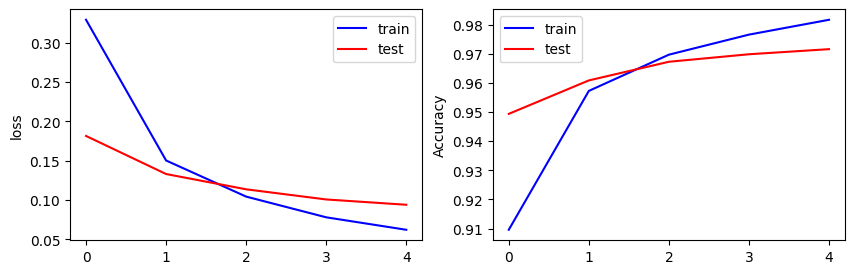

In [18]:
import matplotlib.pyplot as plt
#结果可视化
print(history.history)
loss = history.history['loss']          #训练集损失
val_loss = history.history['val_loss']  #测试集损失
acc = history.history['sparse_categorical_accuracy']            #训练集准确率
val_acc = history.history['val_sparse_categorical_accuracy']    #测试集准确率

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(loss,color='b',label='train')
plt.plot(val_loss,color='r',label='test')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(acc,color='b',label='train')
plt.plot(val_acc,color='r',label='test')
plt.ylabel('Accuracy')
plt.legend()

#暂停5秒关闭画布，否则画布一直打开的同时，会持续占用GPU内存
#plt.ion()       #打开交互式操作模式
#plt.show()
#plt.pause(5)	
#plt.close()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


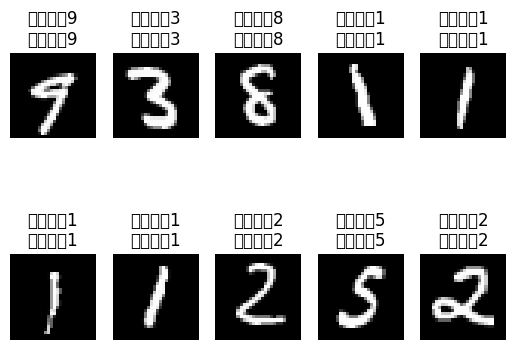

In [20]:
import numpy as np
plt.figure()
for i in range(10):
    num = np.random.randint(1,10000)	#在1~10000之间生成随机整数

    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(test_x[num],cmap='gray')
    demo = tf.reshape(X_test[num],(1,28,28))
    y_pred = np.argmax(model.predict(demo))
    plt.title('标签值：'+str(test_y[num])+'\n预测值：'+str(y_pred))
